In [ ]:
#Developed by Prof. Valerio Bozza, University of Salerno, Italy
import os, glob
import numpy as np
import ccdproc
import matplotlib
import matplotlib.pyplot as plt
from astropy.nddata import CCDData 

In [2]:
flatpath ='/home/astro/Documenti/2023/ELLIP_GALAXY/FlatR/*.FIT'

darkflatpath='/home/astro/Documenti/2023/ELLIP_GALAXY/bias/*.FIT'

masterflatfile ='/home/astro/Documenti/2023/ELLIP_GALAXY/masterflatR.FIT'

In [3]:
darkfiles=glob.glob(darkflatpath)
darkfiles.sort()
print(darkfiles)

['/home/astro/Documenti/2023/ELLIP_GALAXY/bias/bias.00000001.BIAS.FIT', '/home/astro/Documenti/2023/ELLIP_GALAXY/bias/bias.00000002.BIAS.FIT', '/home/astro/Documenti/2023/ELLIP_GALAXY/bias/bias.00000003.BIAS.FIT', '/home/astro/Documenti/2023/ELLIP_GALAXY/bias/bias.00000004.BIAS.FIT', '/home/astro/Documenti/2023/ELLIP_GALAXY/bias/bias.00000005.BIAS.FIT', '/home/astro/Documenti/2023/ELLIP_GALAXY/bias/bias.00000006.BIAS.FIT', '/home/astro/Documenti/2023/ELLIP_GALAXY/bias/bias.00000007.BIAS.FIT', '/home/astro/Documenti/2023/ELLIP_GALAXY/bias/bias.00000008.BIAS.FIT', '/home/astro/Documenti/2023/ELLIP_GALAXY/bias/bias.00000009.BIAS.FIT', '/home/astro/Documenti/2023/ELLIP_GALAXY/bias/bias.00000010.BIAS.FIT', '/home/astro/Documenti/2023/ELLIP_GALAXY/bias/bias.00000011.BIAS.FIT', '/home/astro/Documenti/2023/ELLIP_GALAXY/bias/bias.00000012.BIAS.FIT', '/home/astro/Documenti/2023/ELLIP_GALAXY/bias/bias.00000013.BIAS.FIT', '/home/astro/Documenti/2023/ELLIP_GALAXY/bias/bias.00000014.BIAS.FIT', '/hom

In [4]:
flatfiles=glob.glob(flatpath)
flatfiles.sort()
print(flatfiles)

['/home/astro/Documenti/2023/ELLIP_GALAXY/FlatR/flatR.00000016.FLAT.FIT', '/home/astro/Documenti/2023/ELLIP_GALAXY/FlatR/flatR.00000017.FLAT.FIT', '/home/astro/Documenti/2023/ELLIP_GALAXY/FlatR/flatR.00000018.FLAT.FIT', '/home/astro/Documenti/2023/ELLIP_GALAXY/FlatR/flatR.00000019.FLAT.FIT', '/home/astro/Documenti/2023/ELLIP_GALAXY/FlatR/flatR.00000020.FLAT.FIT', '/home/astro/Documenti/2023/ELLIP_GALAXY/FlatR/flatR.00000021.FLAT.FIT', '/home/astro/Documenti/2023/ELLIP_GALAXY/FlatR/flatR.00000022.FLAT.FIT', '/home/astro/Documenti/2023/ELLIP_GALAXY/FlatR/flatR.00000023.FLAT.FIT', '/home/astro/Documenti/2023/ELLIP_GALAXY/FlatR/flatR.00000024.FLAT.FIT', '/home/astro/Documenti/2023/ELLIP_GALAXY/FlatR/flatR.00000025.FLAT.FIT', '/home/astro/Documenti/2023/ELLIP_GALAXY/FlatR/flatR.00000026.FLAT.FIT', '/home/astro/Documenti/2023/ELLIP_GALAXY/FlatR/flatR.00000027.FLAT.FIT', '/home/astro/Documenti/2023/ELLIP_GALAXY/FlatR/flatR.00000028.FLAT.FIT', '/home/astro/Documenti/2023/ELLIP_GALAXY/FlatR/fla

In [5]:
#flatfiles_V=glob.glob(flatpath_V)
#flatfiles_V.sort()
#print(flatfiles_V)

In [6]:
darks=[CCDData.read(dark,unit='adu') for dark in darkfiles]

In [7]:
combiner=ccdproc.Combiner(darks)

In [8]:
masterdark=combiner.median_combine()

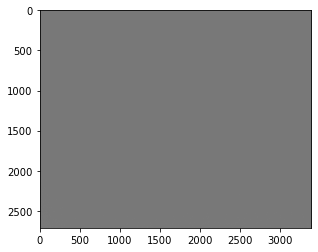

In [9]:
plt.imshow(masterdark.data,norm=matplotlib.colors.Normalize(500,2500,True),
              cmap='gray')

In [10]:
flats =[CCDData.read(flat,unit='adu') for flat in flatfiles]

In [11]:
for flat in flats:
    flat = ccdproc.subtract_bias(flat,masterdark)

In [12]:
scaling_func = lambda arr: 1/np.mean(arr)
combiner.scaling=scaling_func
combiner=ccdproc.Combiner(flats)

In [13]:
imageflat=combiner.median_combine()
masterflat=CCDData(imageflat.data, unit='adu')

In [14]:
masterflat.data[1000][1000]

21649.0

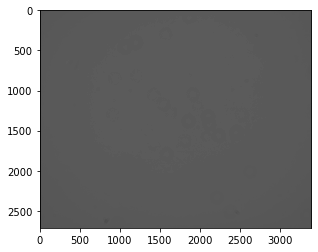

In [15]:
plt.imshow(masterflat.data,norm=matplotlib.colors.Normalize(0,60000,True),
              cmap='gray')

In [16]:
hdulist=masterflat.to_hdu()
hdu0=hdulist[0]
hdu0.scale('uint16')

In [17]:
hdu1=CCDData(hdu0.data, unit="adu")

In [18]:
hdu0.data

array([[ 1358,  1345,  1377, ..., 20265, 20263, 20685],
       [ 1444,  1425,  1454, ..., 20461, 20580, 20382],
       [ 1438,  1428,  1444, ..., 20617, 20201, 20050],
       ...,
       [ 1452,  1440,  1453, ..., 19974, 20166, 20322],
       [ 1449,  1436,  1462, ..., 20214, 20044, 20078],
       [ 1447,  1438,  1456, ..., 20100, 19864, 19917]], dtype=uint16)

In [19]:
hdu1.write(masterflatfile,overwrite=True)

In [20]:
lsflat=[flat.data[1000,1000] for flat in flats]

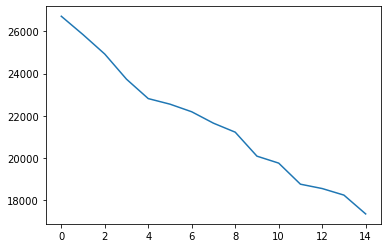

In [21]:
plt.plot(lsflat)

In [22]:
#flats_V =[CCDData.read(flat,unit='adu') for flat in flatfiles_V]

In [23]:
#for flat in flats_V:
 #   flat = ccdproc.subtract_bias(flat,masterdark)

In [24]:
#scaling_func = lambda arr: 1/np.mean(arr)
#combiner.scaling=scaling_func
#combiner=ccdproc.Combiner(flats_V)

In [25]:
#masterflat_V=combiner.median_combine()

In [26]:
#plt.imshow(masterflat_V.data,norm=matplotlib.colors.Normalize(5000,25000,True),
              #cmap='gray')

In [27]:
#masterflat_V.write(masterflatfile_V,overwrite=True)

In [28]:
#lsflat_V=[flat.data[1000,1000] for flat in flats_V]

In [29]:
#plt.plot(lsflat_V)